In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=yf.download("AAPL",period="6mo")
df.to_csv("apple_stock.csv")
print(df)
print("\nWhat columns do we have?")
print(df.columns)

print("\nBasic info about the data:")
print(df.info())

/tmp/ipykernel_655448/958142602.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("AAPL",period="6mo")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-02-05  231.910583  232.110099  227.720693  227.980062   39620300
2025-02-06  232.658768  233.237374  229.875473  230.733404   29925300
2025-02-07  227.082214  233.436880  226.713094  232.040255   39707200
2025-02-10  227.351852  230.288004  226.902445  229.269351   33115600
2025-02-11  232.315353  234.921936  227.831243  227.901144   53718400
...                ...         ...         ...         ...        ...
2025-07-29  211.270004  214.809998  210.820007  214.179993   51411700
2025-07-30  209.050003  212.389999  207.720001  211.899994   45512500
2025-07-31  207.570007  209.839996  207.160004  208.490005   80698400
2025-08-01  202.380005  213.580002  201.500000  210.869995  104434500
2025-08-04  203.350006  207.880005  201.679993  204.509995   75020600

[124 rows x 5 colum

In [42]:
X=df[['Open','High','Low','Volume']]
Y=df['Close']
print(X.head(3))
print(Y.head(3))

Price             Open        High         Low    Volume
Ticker            AAPL        AAPL        AAPL      AAPL
Date                                                    
2025-02-05  227.980062  232.110099  227.720693  39620300
2025-02-06  230.733404  233.237374  229.875473  29925300
2025-02-07  232.040255  233.436880  226.713094  39707200
Ticker            AAPL
Date                  
2025-02-05  231.910583
2025-02-06  232.658768
2025-02-07  227.082214


In [43]:
from sklearn.model_selection import train_test_split
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

print(f"Training features: {X_train.shape}")
print(f"Training target: {Y_train.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Testing target: {Y_test.shape}")

Training features: (99, 4)
Training target: (99, 1)
Testing features: (25, 4)
Testing target: (25, 1)


In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
print('Model trained successfully')

Model trained successfully


In [45]:
predictions=model.predict(X_test)
print("Predictions are made")
print(predictions[:5])

Predictions are made
[[203.73690663]
 [208.7588814 ]
 [211.75268   ]
 [214.16151695]
 [212.55851061]]


In [46]:
comparison = pd.DataFrame({"Actual close": Y_test.values.flatten(),
                          "Predicted close": predictions.flatten()})
print("Comparison (Actual vs Predicted):")
print(comparison.head(10))

Comparison (Actual vs Predicted):
   Actual close  Predicted close
0    205.169998       203.736907
1    207.820007       208.758881
2    212.440002       211.752680
3    213.550003       214.161517
4    209.949997       212.558511
5    210.009995       209.945880
6    211.139999       209.168576
7    212.410004       212.673544
8    211.160004       211.406467
9    208.619995       208.945340


In [47]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,predictions)
r2=r2_score(Y_test,predictions)
if r2 > 0.8:
    print(" Excellent model!")
elif r2 > 0.5:
    print(" Good model!")
else:
    print(" Model needs improvement (expected for stock data)")

 Excellent model!


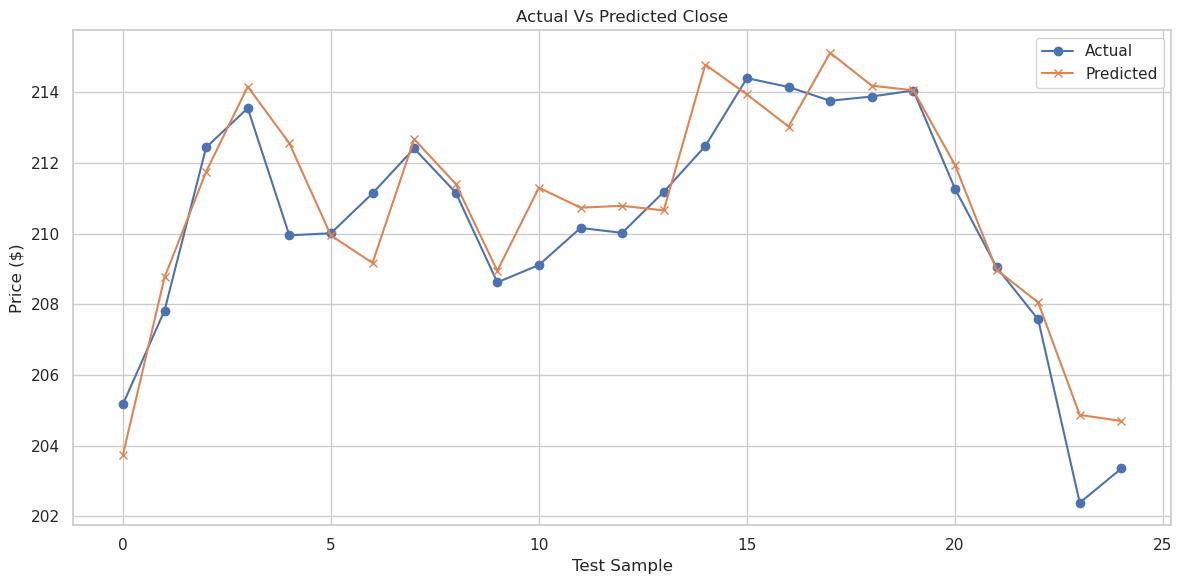

In [48]:
sns.set_theme(style='whitegrid',palette="deep")
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(comparison['Actual close'],label='Actual',marker='o')
ax.plot(comparison['Predicted close'],label='Predicted',marker='x')
ax.set_title("Actual Vs Predicted Close")
ax.set_xlabel('Test Sample')
ax.set_ylabel('Price ($)')
plt.tight_layout()
ax.legend()
plt.show()